<h1><center><font size="25">Graph Machine Learning: Exploración de Grafos y Redes con Python</font></center></h1>

<center><b>Fernando Carazo, Joaquí Amat</b></center>

<center><i>Mayo, 2023</i></center>

## Introducción

Los grafos son estructuras de datos compuestas por nodos y enlaces que se utilizan para representar relaciones entre objetos. Al utilizar el ejemplo de una red social, los nodos representan a los usuarios y los enlaces representan la amistad o el seguimiento entre ellos. Para comprender un grafo, es importante conocer cómo interactúan entre sí sus componentes. Si todavía no está familiarizado con los grafos, se recomienda leer el artículo [Introducción a los Grafos]().


# Parámetros básicos de un grafo
En este segundo artículo, se explorarán las técnicas de análisis descriptivo de los grafos para responder preguntas como quiénes son los usuarios más importantes en una red social. Se presentarán dos parámetros básicos de un grafo:

- El número de nodos, o N, que representa el número de componentes del sistema. A menudo, se usa N para denotar el tamaño de la red. Los nodos se etiquetan con i = 1, 2, ..., N para distinguirlos.

- El número de enlaces, que se denota con L, representa el número total de interacciones entre los nodos. Los enlaces rara vez se etiquetan, ya que se pueden identificar a través de los nodos que conectan. Por ejemplo, el enlace (2, 4) conecta los nodos 2 y 4.

Además de estos parámetros básicos, se explorarán las medidas de centralidad y la distribución de grados en los grafos. Estas medidas se utilizan para analizar la estructura y las características de los grafos, y pueden ayudar a entender mejor la importancia de los nodos y las conexiones en una red.

## Grado, grado medio y distribución de grados

### Grado
Una propiedad clave de cada nodo es su grado, que representa el número de enlaces que tiene con otros nodos. El grado puede representar el número de contactos de teléfono móvil que tiene una persona en el grafo de llamadas (es decir, el número de personas diferentes con las que ha hablado), o el número de citas que recibe un trabajo de investigación en la red de citas.

Grado
Denotamos con $k_i$ el grado del nodo en la red. Por ejemplo, para la red no dirigida mostrada  em la figura XX tenemos $k_1=3, k_2=3, k_3=1, k_4=3, k_5=2$. En una red no dirigida, el número total de enlaces, L, puede expresarse como la suma de los grados de los nodos dividdida entre dos:

$$
L = \frac{1}{2}\sum_{i=1}^N k_i
$$

Aquí el factor 1/2 corrige el hecho de que en la suma cada enlace se cuenta dos veces. Por ejemplo, el enlace que conecta los nodos 2 y 4 en la figura XX se contará una vez en el grado del nodo 2 y una vez en el grado del nodo 4.

En un grafo dirigido, el grado de un nodo se puede definir de dos maneras: el grado de entrada ($k_i^{in}$), que es el número de aristas que apuntan hacia el nodo, y el grado de salida ($k_i^{out}$), que es el número de aristas que salen del nodo.



<p align="center"><img src="../images/09_grafo-5-nodos.png" style="width: 400px"></p>

<center><font size='2.5'>
<i>Grafo de 5 nodos (N = 5) y 6 enlaces (L = 6).</i>
</font></center>

El grado $k_i$ del nodo $i$ se puede obtener de los elementos de la matriz de adyacencia. Para redes no dirigidas, el grado de un nodo es una suma sobre las filas o las columnas de la matriz, es decir:
$$
k_i=\sum_{j=1}^N A_{j i}=\sum_{i=1}^N A_{j i}
$$
Para redes dirigidas, las sumas sobre las filas y columnas de la matriz de adyacencia proporcionan los grados entrantes y salientes, respectivamente.
$$
k_i^{i n}=\sum_{j=1}^N A_{i j}, \quad \quad k_i^{\text {out}}=\sum_{j=1}^N A_{j i}
$$
Dado que en una red no dirigida el número de enlaces salientes es igual al número de enlaces entrantes, tenemos
$$
2 L=\sum_{i=1}^N k_i^{i n}=\sum_{i=1}^N k_i^{\text {out}}=\sum_{i j}^N A_{i j}
$$
El número de elementos distintos de cero de la matriz de adyacencia es $2 L$, o el doble del número de enlaces. De hecho, un enlace no dirigido que conecta los nodos $i$ y $j$ aparece en dos entradas: $A_{i j}=1$, un enlace que apunta desde el nodo $j$ al nodo $i$, y $A_{i i}=1 $, un enlace que apunta de $i$ a $j$.

## Grado medio

El grado medio representa el número medio de conexiones que tienen los nodos de un grafo. Se calcula como la suma los grados de todos los nodos dividida por el número de nodos. La importancia de esta medida reside en que permite comparar redes de distintos tamaños entre sí. Por estadística, una red con más nodosEl número de conexiones de los nodos de un grafo es igual al número de ejes multiplicado por dos. Por tanto, el número medio de conexiones de un grafo es:

$$
\langle k\rangle=\frac{1}{N} \sum_{i=1}^N k_i=\frac{2 L}{N}
$$


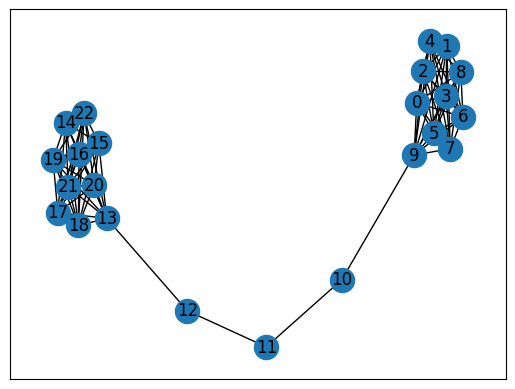

In [1]:
import networkx as nx

# Cargamos un grafo de ejemplo lollypop
G = nx.barbell_graph(m1=10, m2=3)
nx.draw_networkx(G,)

In [3]:
nodos = G.number_of_nodes()
ejes = G.number_of_edges()

k = ejes*2/nodos

print(f"Grafo con {nodos} nodos, {ejes} ejes y número medio de conexiones {k:.2f}")



Grafo con 23 nodos, 94 ejes y número medio de conexiones 8.17


## Distribución de grados

La distribución de grados, pk, proporciona la probabilidad de que un nodo seleccionado al azar en la red tenga un grado k. Dado que pk es una probabilidad, debe normalizarse, es decir

$$
\sum_{k=1}^{\infty} p_k=1
$$
Para una red con $\mathrm{N}$ nodos, la distribución de grados es el histograma normalizado está dado por
$$
p_k=\frac{N_k}{N}
$$
donde $N_k$ es el número de nodos de grado k. Por lo tanto, el número de nodos de grado k se puede obtener a partir de la distribución de grados como $N_k=N p_k$.

La distribución de grados ha asumido un papel central en la teoría de redes tras el descubrimiento de las redes libres de escala [8]. Una razón es que el cálculo de la mayoría de las propiedades de la red requiere que conozcamos $p_k$. Por ejemplo, el grado promedio de una red se puede escribir como
$$
\langle k\rangle=\sum_{k=0}^{\infty} k p_k
$$
La otra razón es que la forma funcional precisa de $p_k$ determina muchos fenómenos de red, desde la solidez de la red hasta la propagación de virus.

<p align="center"><img src="../images/00_degree-dist.jpeg" style="width: 400px"></p>

<center><font size='2.5'>
<i>Distribución de grados.</i>
</font></center>

## Comparativa de redes

Estas redes de referencia, enumeradas en la Tabla inferior, abarcan:

- Sistemas sociales (grafo de llamadas móviles o red de correo electrónico), 
- Redes de colaboración y afiliación (red de colaboración científica, red de actores de Hollywood), 
- Sistemas de información (WWW), sistemas tecnológicos y de infraestructura (Internet y red eléctrica). ), 
- Sistemas biológicos (interacción de proteínas y red metabólica) y redes de referencia (citas). 

Difieren ampliamente en sus tamaños, desde tan solo N = 1039 nodos en el metabolismo de E. coli, hasta casi medio millón de nodos en la red de citas. Cubren varias áreas en las que las redes se aplican activamente y representan conjuntos de datos "canónicos" que los investigadores utilizan con frecuencia para ilustrar las propiedades clave de la red. Como indicamos en la Tabla, algunos de ellos son dirigidos, otros son no dirigidos.

Fuente: http://networksciencebook.com/

| **Red** | **Nodos** | **Enlaces** | **Dirigido / No dirigido** | **N** | **L** | **‹K›** |
|---------------------------|----------------------------|----------------------|---------------------------|---------|------------|---------|
| **Internet** | Routers | Conexiones a Internet | No dirigido | 192,244 | 609,066 | 6.34 |
| **WWW** | paginas web | Enlaces | Dirigida | 325,729 | 1,497,134 | 4.60 |
| **Red eléctrica** | Centrales eléctricas, transformadores | Cables | No dirigido | 4,941 | 6,594 | 2.67 |
| **Llamadas a teléfonos móviles** | Suscriptores | Llamadas | Dirigido | 36,595 | 91,826 | 2.51 |
| **Correo electrónico** | Direcciones de correo electrónico | Correos electrónicos | Dirigido | 57,194 | 103,731 | 1.81 |
| **Colaboración científica** | Científicos | Coautorías | No dirigido | 23,133 | 93,437 | 8.08 |
| **Red de actores** | Actores | Co-actuando | No dirigido | 702,388 | 29,397,908 | 83.71 |
| **Red de citas** | Papeles | Citas | Dirigido | 449,673 | 4.689,479 | 10.43 |
| **MI. Metabolismo coli** | Metabolitos | Reacciones químicas | Dirigido | 1,039 | 5,802 | 5.58 |
| **Interacciones de proteínas** | Proteínas | Interacciones vinculantes | No dirigido | 2,018 | 2,930 | 2,90 |

# Diagnóstico de grafos

Como bien hemos aprendido en [cienciadedatos.net](cienciadedatos.net), en ciencia de datos, lo primero que hay que hacer al tener un dataset es realizar un análisis exploratorio de los datos o EDA por sus siglas en inglés.

¿Cómo se puede hacer un EDA de un grafo? Para ello introducimos las propiedades de los grafos. Algunas son más importantes que otras, pero entre todas ellas nos darán una visión global del grafo que estamos analizando.

Se resumen en tres grupos principales según se relacionen con 1) nodos individuales, 2) conjuntos de nodos o 3) propiedades globales de la red:

<p align="center"><img src="../images/drawio/03_properties.drawio.svg" style="width: 400px"></p>

<center><font size='2.5'>
<i>Distribución de grados.</i>
</font></center>


### ¿Cuál es el nodo más importante de la red?


Tras un primer vistazo, podemos observar que algunos nodos tendrán propiedades muy diferentes.

Por ejemplo, los nodos 11, 10 y 12 son nodos muy importantes si consideramos la "betweenness de la red". Lo que quiere decir que estos nodos forma parte del único camino posible entre muchos pares de nodos. En otras palabras: si estos nodos desaparecen, los dos clusters de nodos dejarían de estar conectados.

Por otro lado, los nodos de los clusters, por ejemplo el nodo 17, tiene una alta conectividad: está conectado a muchos otros nodos (alto degree).

Dependiendo de a qué característica le demos más importancia, diremos que el nodo más importante de la red es uno u otro.

En este apartado utilizaremos el primer modelo de generación de grafos: barbell_graph. Los modelos de generación de grafos son algoritmos que generan grafos con distintas propiedades. Hay muchos modelos de generación de grafos, iremos viendo algunos de ellos a medida que avance el curso.

El barbell graph permite generar un grafo con dos conjuntos de N nodos con alta conectividad (m1) unidos por una cadena de nodos (m2).

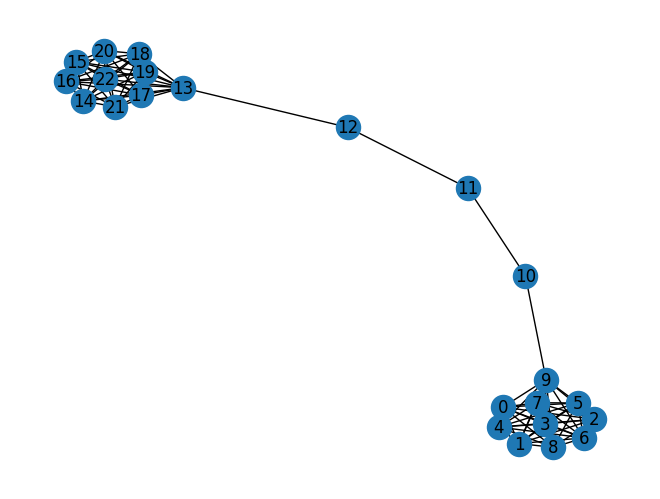

In [4]:
G =nx.barbell_graph(m1=10, m2=3)
nx.draw(G, with_labels=True)

### ¿Cuál es el nodo más importante de la red?

Tras un primer vistazo, podemos observar que algunos nodos tendrán propiedades muy diferentes.

Por ejemplo, los nodos 11, 10 y 12 son nodos muy importantes si consideramos la "betweenness de la red". Lo que quiere decir que estos nodos forma parte del único camino posible entre muchos pares de nodos. En otras palabras: si estos nodos desaparecen, los dos clusters de nodos dejarían de estar conectados.

Por otro lado, los nodos de los clusters, por ejemplo el nodo 17, tiene una alta conectividad: está conectado a muchos otros nodos (alto degree).

Dependiendo de a qué característica le demos más importancia, diremos que el nodo más importante de la red es uno u otro.

## Número de nodos y ejes

Lo primero que exploraremos del grafo son el número de ejes y de nodos. Nuestro grafo tiene 23 nodos y 94 ejes.

In [5]:
G.number_of_nodes(), G.number_of_edges()

(23, 94)

## 1. Centralidad

Cuando se analizan redes es común que se desee encontrar los nodos que son más importantes para la red. En términos generales, la importancia de un nodo depende de su posición en la red. A medida que las redes se vuelven más complejas, será necesario emplear medidas de centralidad para describirlas. Así como en la estadística se cuenta con medidas de tendencia central como la mediana y la moda para caracterizar dónde se encuentra el “centro” de los datos, en el caso de las redes se cuenta con medidas de centralidad para determinar los nodos más importantes. 

En otras palabras, la centralidad mide la importancia de cada nodo según distintos criterios. Por lo tanto, estas funciones nos devolverán un vector de la misma longitud que el número de nodos.



### 1.1. Medidas locales

El adjetivo local se debe a que estas medidas solo toman en cuenta la influencia de un nodo sobre sus compañeros más cercanos. Estas medidas locales de centralidad muestran la importancia de un nodo teniendo en cuenta su posición en un contexto cercano, los nodos que tienen cerca.

#### 1.1.1 Grado de centralidad (Degree): Número de conexiones de un nodo.

Para obtener esta medida basta con contar el número de enlaces relacionados con cada nodo (Tanto los entrantes como los salientes de cada nodo). Tal y como está definida, esta estadística hará que destaquen aquellos nodos conectados a las sub-redes más amplias. Un valor más grande de esta medida indicará una mayor centralidad del nodo. 

El degree de un nodo se puede calcular directamente desde la matriz de adyacencia del grafo.

* Para un grafo no dirigido:

$Degree = \sum_i{A_{ij}} = \sum_j{A_{ij}}$

Esta métrica se puede presentar también de manera normalizada; es decir, dividiendo el número de enlaces relacionados con cada uno de los n nodos dividido por n-1.

* Degree Centrality: Número de conexiones de un nodo normalizado.

$Degree Centrality = \frac{\sum_i{A_{ij}}}{N-1}$

Otras variantes de esta medida de centralidad solo consideran los enlaces de salida (out-degree) de cada nodo o solo los de entrada (in-degree). Estas últimas dos métricas pueden estar normalizadas o no. La normalización puede ser importante cuando se quiere comparar esta métrica entre diferentes grafos con números de nodos muy diferentes.

* Para un grafo dirigido, existen dos tipos de Degree según nos refiramos a conexiones entrante o salientes: 

$inDegree = \sum_i{A_{ij}}$

$outDegree = \sum_j{A_{ij}}$


#### 1.1.2 Betweenness

Esta medida cuantifica el número de veces que un nodo actúa como un puente a lo largo de la ruta geodésica (esto es, la de menor longitud) entre dos nodos. Su cálculo implica los siguientes pasos: 

1. Contar el número de rutas que unen un par de nodos (i y j).
2. Encontrar la proporción de esas rutas que pasan por un tercer nodo (v).
3. Repetir el cálculo para todas las parejas de nodos posibles (con la condición de que i y j sean diferentes de v) hallando en cada caso la proporción de rutas que pasan por el nodo v
4. Sumar todas las proporciones obtenidas. Tomando σij como el número de rutas de mínima distancia que unen a los nodos i y j, y σij(v) como el número de rutas de distancia mínima que unen a estos nodos y que pasan por el nodo v, entonces la métrica de Betweenness para el nodo v está dada por:

$$
\operatorname{Betweenness}(v)=\sum_{i \neq v \varepsilon V} \sum_{j \neq v \varepsilon V} \delta_{i j}
$$

donde $\delta_{i j}(v)=\frac{\sigma_{i j}(v)}{\sigma_{i j}}$.

Esta métrica solo toma valores entre cero y el número de parejas posibles dentro del grafo (excluyendo el nodo para el cual se está efectuando el cálculo). Esto es, si N es el número total de nodos, entonces la cota superior toma el valor de $\frac{(N-1) !}{2 !((N-1)-2) !}$.

Por otra parte, tal y como se ha mencionado de manera implícita, entre mayor sea el Betweenness mayor será la centralidad del nodo. En la red que veremos en el siguiente apartado, el nodo 11 es el más propenso a actuar como puente entre sus compañeros. 

Este estadístico también se puede presentar de manera normalizada multiplicando cada Between- ness(v) por la siguiente constante:

$\frac{2}{n(n-3)(n+2)}$



### 1.2 Medidas Globales de Centralidad 

Las medidas globales muestran la importancia de un nodo teniendo en cuenta su posición en el conjunto la red. De manera general, estas medidas identifican a aquellos agentes que están mejor ubicados para influir en toda la red lo más rápidamente posible. Ejemplos, de esta medida globales de centralidad son:

#### 1.2.1 Closeness Centrality: Da una idea de "Cómo de cerca está un nodo del resto de nodos de la red".

Para un nodo "x", se calcula dividiendo el número de nodos a los que se puede ir desde ese nodo (N-1) entre la suma de todas distancias de ese nodo "x" al resto de nodos. Es decir, calcula las rutas más cortas entre todos los nodos y asigna una puntuación a cada uno en función de la suma de sus rutas. Mide cuántos pasos se requieren para conectarse a cada uno de los nodos desde un nodo determinado. 

En general, es una medida de cuánto tarda en llegar la información de un nodo al resto de la red. Esta medida se calcula de la siguiente manera:

$ClosenessCentrality = \frac{N-1}{\sum_j{d_{i,j}}}$

Es fácil deducir que esta medida estará entre cero y uno. Adicionalmente, entre más cercana a 1 esté, mayor será la centralidad del nodo.

Así como el grado de centralidad, esta métrica puede calcularse considerando solo las rutas de salida (out) de cada nodo o solo las rutas de entrada (in). Estas últimas dos métricas pueden estar normalizadas o no.

#### 1.2.2. - Excentricidad: 

Mide la distancia de cada nodo al nodo más lejano.

$Excentricidad(i)=\max [\operatorname{dist}(i, j)], \quad \forall j$

### Y ahora, en nuestro grafo con networkx

In [6]:
# Grado de los nodos: el número de conexiones de cada nodo.
nx.degree(G)

DegreeView({0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 10, 10: 2, 11: 2, 12: 2, 13: 10, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9, 19: 9, 20: 9, 21: 9, 22: 9})

In [7]:
print(f""""

**1. Propiedades de los nodos.**

Mide la importancia de cada nodo según distintos criterios. Estas funciones nos devolverán un vector de la misma longitud que el número de nodos.

Locales: muestran la importancia de un nodo teniendo en cuenta su posición en un contexto cercano, los nodos que tienen cerca.

        - Degree: Número de conexiones de un nodo.
                nx.degree(G)[11] = {nx.degree(G)[11]}
                nx.degree(G)[17] = {nx.degree(G)[17]}

        - Degree Centrality: Número de conexiones de un nodo normalizado con el número global de conexiones.
                nx.degree_centrality(G)[11] = {nx.degree_centrality(G)[11]:.2}
                nx.degree_centrality(G)[17] = {nx.degree_centrality(G)[17]:.2}

Globales: muestran la importancia de un nodo teniendo en cuenta su posición en toda la red.

        - Closeness Centrality: Da una idea de "Cómo de cerca está un nodo del resto de nodos de la red".
                nx.closeness_centrality(G)[11] = {nx.closeness_centrality(G)[11]:.2}
                nx.closeness_centrality(G)[17] = {nx.closeness_centrality(G)[17]:.2}

        - Betweenness Centrality: Mide cuántas veces un nodo forma parte del camino más cercano entre dos nodos.
                nx.betweenness_centrality(G)[11] = {nx.betweenness_centrality(G)[11]:.2}
                nx.betweenness_centrality(G)[17] = {nx.betweenness_centrality(G)[17]:.2}

        - Eccentricity: Distancia al nodo más lejano.
                nx.eccentricity(G)[11] = {nx.eccentricity(G)[11]}
                nx.eccentricity(G)[17] = {nx.eccentricity(G)[17]}
""")


"

**1. Propiedades de los nodos.**

Mide la importancia de cada nodo según distintos criterios. Estas funciones nos devolverán un vector de la misma longitud que el número de nodos.

Locales: muestran la importancia de un nodo teniendo en cuenta su posición en un contexto cercano, los nodos que tienen cerca.

        - Degree: Número de conexiones de un nodo.
                nx.degree(G)[11] = 2
                nx.degree(G)[17] = 9

        - Degree Centrality: Número de conexiones de un nodo normalizado con el número global de conexiones.
                nx.degree_centrality(G)[11] = 0.091
                nx.degree_centrality(G)[17] = 0.41

Globales: muestran la importancia de un nodo teniendo en cuenta su posición en toda la red.

        - Closeness Centrality: Da una idea de "Cómo de cerca está un nodo del resto de nodos de la red".
                nx.closeness_centrality(G)[11] = 0.37
                nx.closeness_centrality(G)[17] = 0.29

        - Betweenness Centrality: Mide cu

## 2. Propiedades globales del grafo. Medidas agregadas

Diámetro: mide la máxima excentricidad.

$Dimetro = max[Excentricidad(i)], ∀i$

Esto es, el par de nodos más alejados en toda la red requieren de dos pases para conectarse.
Densidad: es la proporción de pares de nodos conectados en la red sobre todos los posibles. Si esta medida es 1 (o 100%), entonces el grafo es totalmente conexo (todos los nodos se conectan de manera directa con todos). Tomando n como el número total de nodos y E como el número de pares conectados en el grafo, entonces, la densidad se calcula como:
D=E 12n(n−1)
donde 21 n(n−1) es el número total de pares de nodos conectados que pueden existir en el grafo. El cálculo de esta medida solo exige el conocimiento de si un par de nodos se conectaron o no, no
 10
se requiere saber el número de conexiones. Así que se debe transformar la matriz de adyacencia para que contenga solo dos valores: ceros (en caso de que no haya conexión) y unos (cuando hay conexión). Para el equipo francés, según el cálculo mostrado en el cuadro , el parámetro de la densidad toma un valor igual a 66%. Es decir, de todas las posibles conexiones (100%), se hicieron efectivas el 66 %.




- Degree medio: Número de conexiones medio de los nodos de un grafo.
- Densidad del grafo: Número de conexiones / Número posible de conexiones.
$D=\frac{E}{\frac{1}{2} n(n-1)}$



- Diámetro: Excentricidad máxima: Distancia máxima entre dos nodos.
- Transitividad: es una medida de la ocurrencia de pequeñas subredes de tres nodos totalmente conectados.
- Reciprocidad: mide la probabilidad de que, dado que existe una conexión entre i y j que parte de i, exista una conexión entre estos que parta de j. 


In [8]:
print(f"""

**2. Propiedades globales del grafo.**

        - Degree medio: Número de conexiones medio de los nodos de un grafo.
                {((G.number_of_edges()*2) / G.number_of_nodes()):,.3}
        - Densidad del grafo: Número de conexiones / Número posible de conexiones.
                {nx.density(G)}
        - Diámetro: Distancia máxima entre dos nodos.
                {nx.diameter(G)}
                {nx.diameter(G) == max(nx.eccentricity(G))}

        - Otras medidas: Transitividad, Reciprocidad.
                {nx.transitivity(G)}
                {nx.algorithms.clustering(G)}

"""

)



**2. Propiedades globales del grafo.**

        - Degree medio: Número de conexiones medio de los nodos de un grafo.
                8.17
        - Densidad del grafo: Número de conexiones / Número posible de conexiones.
                0.3715415019762846
        - Diámetro: Distancia máxima entre dos nodos.
                6
                False

        - Otras medidas: Transitividad, Reciprocidad.
                0.97165991902834
                {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0.8, 10: 0, 11: 0, 12: 0, 13: 0.8, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0}




## 3. Propiedades de conjuntos de nodos

Como veremos, el grado del nodo es una de las propiedades más importante de la teoría de grafos ya que se pueden estraer muchas conclusiones de su análisis.

In [9]:
print(f""""

**2. Propiedades entre conjuntos de nodos.**

        - Distancia entre dos nodos
                {list(nx.algorithms.all_pairs_shortest_path(G))[0]}

        - Cliqués: conjuntos de nodos con conectividad completa (todos los nodos conectados con todos)
                {list(nx.algorithms.clique.find_cliques(G))}

""")


"

**2. Propiedades entre conjuntos de nodos.**

        - Distancia entre dos nodos
                (0, {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 9: [0, 9], 10: [0, 9, 10], 11: [0, 9, 10, 11], 12: [0, 9, 10, 11, 12], 13: [0, 9, 10, 11, 12, 13], 14: [0, 9, 10, 11, 12, 13, 14], 15: [0, 9, 10, 11, 12, 13, 15], 16: [0, 9, 10, 11, 12, 13, 16], 17: [0, 9, 10, 11, 12, 13, 17], 18: [0, 9, 10, 11, 12, 13, 18], 19: [0, 9, 10, 11, 12, 13, 19], 20: [0, 9, 10, 11, 12, 13, 20], 21: [0, 9, 10, 11, 12, 13, 21], 22: [0, 9, 10, 11, 12, 13, 22]})

        - Cliqués: conjuntos de nodos con conectividad completa (todos los nodos conectados con todos)
                [[9, 0, 1, 2, 3, 4, 8, 5, 6, 7], [9, 10], [11, 10], [11, 12], [12, 13], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]




# References



https://towardsdatascience.com/graph-machine-learning-with-python-pt-1-basics-metrics-and-algorithms-cc40972de113

https://towardsdatascience.com/graph-machine-learning-with-python-pt-2-random-graphs-and-diffusion-models-of-cryptopunks-trading-99cd5170b5ea

https://towardsdatascience.com/graph-machine-learning-with-python-part-3-unsupervised-learning-aa2854fe0ff2

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/

http://networksciencebook.com/



## Información de sesión

In [ ]:
from sinfo import sinfo
sinfo()

## Bibliografía
<br>

Linear Models with R by Julian J.Faraway [libro](https://www.amazon.es/gp/product/1439887330/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=cienciadedato-21&creative=24630&linkCode=as2&creativeASIN=1439887330&linkId=e9ca62e854567fb3f9d0ea044f084b11)

**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Graph Machine Learning: Grafos by Fernando Carazo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by Fernando Carazo is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    #font-size: 16px;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    #font-size: 1em;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>